In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Years=[]
for i in range (1955,2006):
    i=str(i)
    Years.append(i)

In [3]:
df=pd.read_csv(r"C:\Users\Geord\Desktop\Fortune500\Data\Fortune5001955.csv",index_col=0)
revdf=df.drop(df.columns[1],axis=1)
prodf=df.drop(df.columns[0],axis=1)

RevenueData=revdf
ProfitData=prodf

for y in Years:
    # importing csv
    df=pd.read_csv(r"C:\Users\Geord\Desktop\Fortune500\Data\Fortune500"+ y +".csv",index_col=0)
    df=df.drop(df.columns[1],axis=1)
    RevenueData=pd.concat([df,RevenueData],axis=1)
    
for y in Years:
    # importing csv
    df=pd.read_csv(r"C:\Users\Geord\Desktop\Fortune500\Data\Fortune500"+ y +".csv",index_col=0)
    df=df.drop(df.columns[0],axis=1)
    ProfitData=pd.concat([df,ProfitData],axis=1)

In [4]:
RevenueData = RevenueData.replace(',','', regex=True)
RevenueData = RevenueData.astype(float)
RevenueData = RevenueData.iloc[:, ::-1]

ProfitData = ProfitData.replace(',','', regex=True)
ProfitData = ProfitData.replace('N.A','0', regex=True)
ProfitData = ProfitData.replace('N.A.','0', regex=True)
ProfitData = ProfitData.iloc[:, ::-1]
ProfitData = ProfitData.astype(float)

In [5]:
Years= [eval(i) for i in Years]
Years.pop(0)

1955

In [6]:
def Chart(Company):
    
    RevenueGrowth=[]
    ProfitMargin=[]
    
    
    for i in range(1,51):
        RevenueGrowth.append(((RevenueData.loc[Company])[i]/(RevenueData.loc[Company])[i-1]-1)*100)
        ProfitMargin.append(((ProfitData.loc[Company])[i]/(RevenueData.loc[Company])[i])*100)
        
    
    plt.title(Company)
    plt.plot(Years,RevenueGrowth)
    plt.plot(Years,ProfitMargin)
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    plt.legend(["Revenue Growth","Profit Margin"],loc ="lower right")
    ax = plt.gca()
    ax.set_ylim([-50,50])
    plt.show()

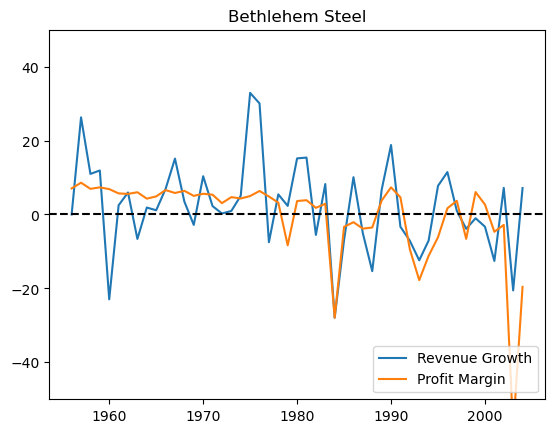

In [7]:
# This is what a bussiness in decline looks like
Chart("Bethlehem Steel")

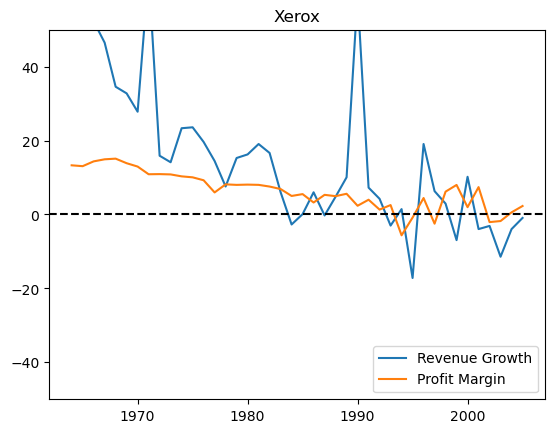

In [8]:
# First a growing bussiness then a declining one
Chart("Xerox")

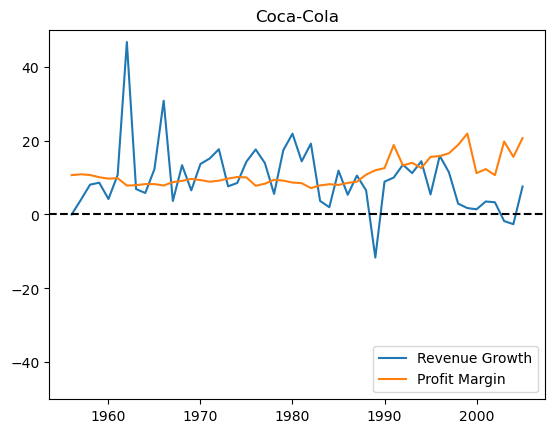

In [9]:
# Slow and steady wins the race
Chart("Coca-Cola")

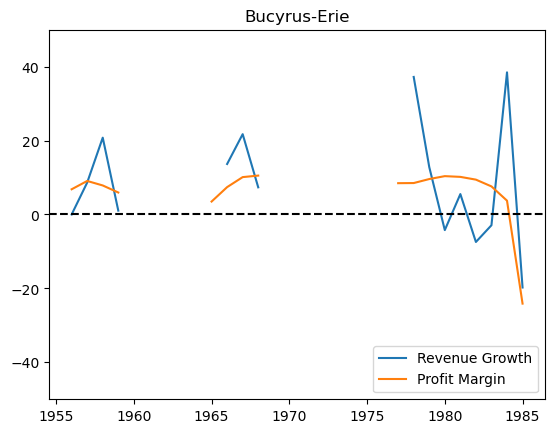

In [15]:
# The decline of thie bussiness is personal to me as it was once the main employer in my home zip code of 53172
Chart("Bucyrus-Erie")